In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import spikeinterface.full as si
import numpy as np
import psutil
from spikeinterface.toolkit import get_noise_levels
import pylab as plt

filename = 'recordings_Neuronexus-32_static.h5'
job_kwargs = {'n_jobs': -1, 'progress_bar' :True, 'chunk_memory' : '10M', 'verbose': True}

In [3]:
from spikeinterface.sortingcomponents.benchmark import benchmark_clustering
from spikeinterface.sortingcomponents.peak_detection import detect_peaks
from spikeinterface.sortingcomponents.peak_selection import select_peaks
from spikeinterface.sortingcomponents.peak_localization import localize_peaks

/home/pierre/anaconda3/envs/circus/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
benchmark = benchmark_clustering.BenchmarkClustering(filename, 'position', job_kwargs=job_kwargs)

peaks = detect_peaks(benchmark.recording_f, 'locally_exclusive', **job_kwargs)
noise_levels = get_noise_levels(benchmark.recording_f)
selected_peaks = select_peaks(peaks, 'smart_sampling_amplitudes', noise_levels=noise_levels, n_peaks=10000, **job_kwargs)
positions = localize_peaks(benchmark.recording_f, selected_peaks, **job_kwargs)

detect peaks with n_jobs 12  chunk_size 78125


detect peaks: 100%|█████████████████████████████████████████████████████████████████| 246/246 [00:10<00:00, 22.77it/s]


localize peaks with n_jobs 12  chunk_size 78125


localize peaks: 100%|███████████████████████████████████████████████████████████████| 246/246 [00:09<00:00, 25.99it/s]


In [5]:
benchmarks = {}

for method in ['sliding_hdbscan', 'position', 'twisted','position_ptp_scaled','position_and_pca']:
    benchmarks[method] = benchmark_clustering.BenchmarkClustering(filename, method, job_kwargs=job_kwargs)
    benchmarks[method].run(selected_peaks, positions, method_kwargs={})

Launching the sliding_hdbscan clustering algorithm with 110575 peaks
extract waveforms memmap with n_jobs 12  chunk_size 78125


extract waveforms memmap: 100%|█████████████████████████████████████████████████████| 246/246 [00:08<00:00, 28.17it/s]


extract waveforms memmap with n_jobs 12  chunk_size 78125


extract waveforms memmap: 100%|█████████████████████████████████████████████████████| 246/246 [00:08<00:00, 29.36it/s]


Performing the comparison with (sliced) ground truth
Extracting waveforms for gt
extract waveforms memmap with n_jobs 12  chunk_size 78125


extract waveforms memmap: 100%|█████████████████████████████████████████████████████| 246/246 [00:08<00:00, 30.26it/s]


Extracting waveforms for clustering
extract waveforms memmap with n_jobs 12  chunk_size 78125


extract waveforms memmap: 100%|█████████████████████████████████████████████████████| 246/246 [00:08<00:00, 30.45it/s]


Extracting waveforms for full_gt
extract waveforms memmap with n_jobs 12  chunk_size 78125


extract waveforms memmap: 100%|█████████████████████████████████████████████████████| 246/246 [00:08<00:00, 29.32it/s]


Computing gt peaks
Localizing gt peaks with method center_of_mass
localize peaks with n_jobs 12  chunk_size 78125


localize peaks: 100%|███████████████████████████████████████████████████████████████| 246/246 [00:08<00:00, 29.32it/s]


Launching the position clustering algorithm with 110575 peaks
Performing the comparison with (sliced) ground truth
Extracting waveforms for gt
extract waveforms memmap with n_jobs 12  chunk_size 78125


extract waveforms memmap: 100%|█████████████████████████████████████████████████████| 246/246 [00:08<00:00, 29.60it/s]


Extracting waveforms for clustering
extract waveforms memmap with n_jobs 12  chunk_size 78125


extract waveforms memmap: 100%|█████████████████████████████████████████████████████| 246/246 [00:07<00:00, 32.83it/s]


Extracting waveforms for full_gt
extract waveforms memmap with n_jobs 12  chunk_size 78125


extract waveforms memmap: 100%|█████████████████████████████████████████████████████| 246/246 [00:07<00:00, 30.79it/s]


Computing gt peaks
Localizing gt peaks with method center_of_mass
localize peaks with n_jobs 12  chunk_size 78125


localize peaks: 100%|███████████████████████████████████████████████████████████████| 246/246 [00:08<00:00, 29.17it/s]


Launching the twisted clustering algorithm with 110575 peaks
extract waveforms memmap with n_jobs 12  chunk_size 78125


extract waveforms memmap: 100%|█████████████████████████████████████████████████████| 246/246 [00:08<00:00, 28.74it/s]


Performing the comparison with (sliced) ground truth
Extracting waveforms for gt
extract waveforms memmap with n_jobs 12  chunk_size 78125


extract waveforms memmap: 100%|█████████████████████████████████████████████████████| 246/246 [00:08<00:00, 27.54it/s]


Extracting waveforms for clustering
extract waveforms memmap with n_jobs 12  chunk_size 78125


extract waveforms memmap: 100%|█████████████████████████████████████████████████████| 246/246 [00:08<00:00, 28.01it/s]


Extracting waveforms for full_gt
extract waveforms memmap with n_jobs 12  chunk_size 78125


extract waveforms memmap: 100%|█████████████████████████████████████████████████████| 246/246 [00:08<00:00, 30.28it/s]


Computing gt peaks
Localizing gt peaks with method center_of_mass
localize peaks with n_jobs 12  chunk_size 78125


localize peaks: 100%|███████████████████████████████████████████████████████████████| 246/246 [00:08<00:00, 29.14it/s]


Launching the position_ptp_scaled clustering algorithm with 110575 peaks
compute waveform features with n_jobs 12  chunk_size 78125


compute waveform features: 100%|████████████████████████████████████████████████████| 246/246 [00:08<00:00, 28.27it/s]


Performing the comparison with (sliced) ground truth
Extracting waveforms for gt
extract waveforms memmap with n_jobs 12  chunk_size 78125


extract waveforms memmap: 100%|█████████████████████████████████████████████████████| 246/246 [00:08<00:00, 28.83it/s]


Extracting waveforms for clustering
extract waveforms memmap with n_jobs 12  chunk_size 78125


extract waveforms memmap: 100%|█████████████████████████████████████████████████████| 246/246 [00:08<00:00, 30.29it/s]


Extracting waveforms for full_gt
extract waveforms memmap with n_jobs 12  chunk_size 78125


extract waveforms memmap: 100%|█████████████████████████████████████████████████████| 246/246 [00:08<00:00, 30.62it/s]


Computing gt peaks
Localizing gt peaks with method center_of_mass
localize peaks with n_jobs 12  chunk_size 78125


localize peaks: 100%|███████████████████████████████████████████████████████████████| 246/246 [00:08<00:00, 27.79it/s]


Launching the position_and_pca clustering algorithm with 110575 peaks
localize peaks with n_jobs 12  chunk_size 78125


localize peaks: 100%|███████████████████████████████████████████████████████████████| 246/246 [00:08<00:00, 28.05it/s]


extract waveforms memmap with n_jobs 12  chunk_size 78125


extract waveforms memmap: 100%|█████████████████████████████████████████████████████| 246/246 [00:08<00:00, 30.49it/s]


Launching the local pca for splitting purposes
extract waveforms memmap with n_jobs 12  chunk_size 78125


extract waveforms memmap: 100%|█████████████████████████████████████████████████████| 246/246 [00:09<00:00, 26.79it/s]


Performing the comparison with (sliced) ground truth
Extracting waveforms for gt
extract waveforms memmap with n_jobs 12  chunk_size 78125


extract waveforms memmap: 100%|█████████████████████████████████████████████████████| 246/246 [00:09<00:00, 24.93it/s]


Extracting waveforms for clustering
extract waveforms memmap with n_jobs 12  chunk_size 78125


extract waveforms memmap: 100%|█████████████████████████████████████████████████████| 246/246 [00:17<00:00, 13.92it/s]


Extracting waveforms for full_gt
extract waveforms memmap with n_jobs 12  chunk_size 78125


extract waveforms memmap: 100%|█████████████████████████████████████████████████████| 246/246 [00:17<00:00, 13.86it/s]


Computing gt peaks
Localizing gt peaks with method center_of_mass
localize peaks with n_jobs 12  chunk_size 78125


localize peaks: 100%|███████████████████████████████████████████████████████████████| 246/246 [00:18<00:00, 13.63it/s]


# Clustering with sliding_HDBSCAN (see Sam for details)

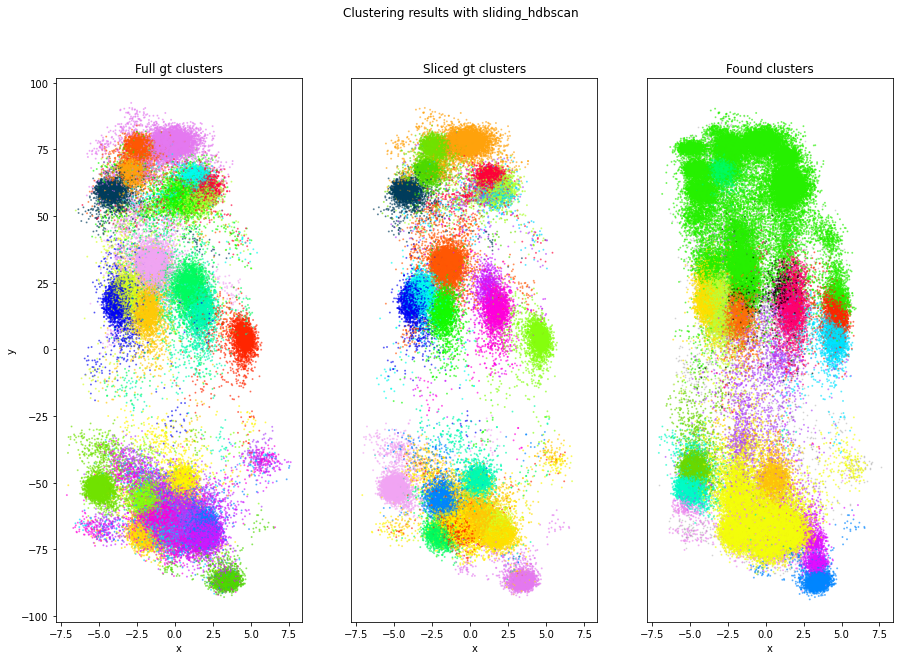

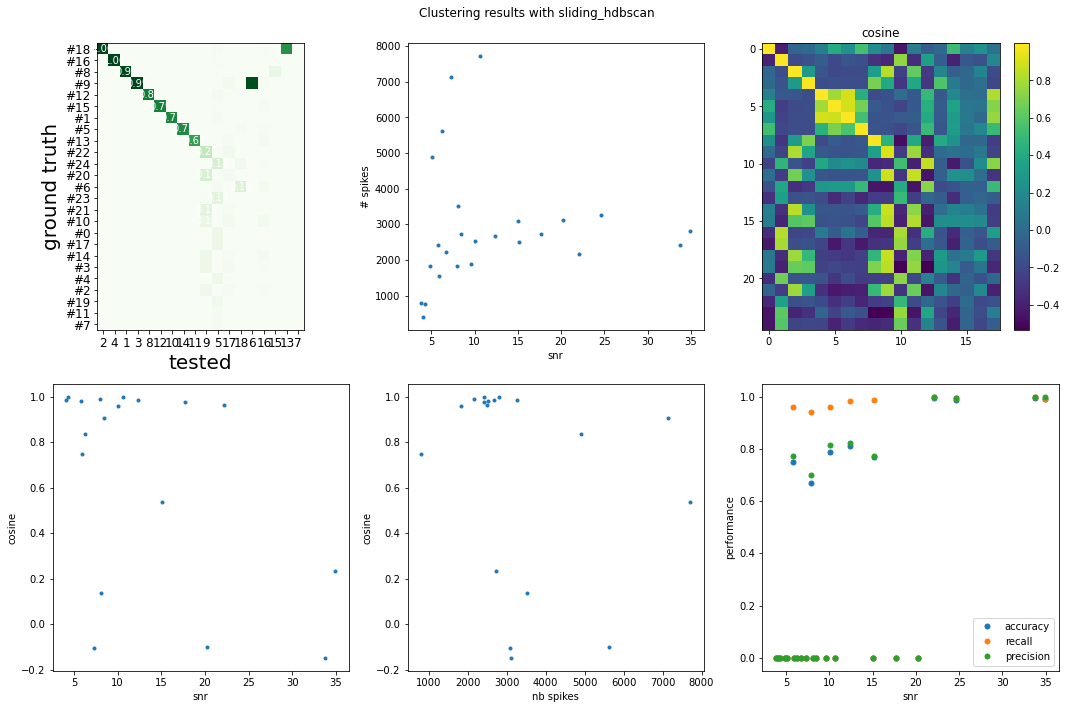

In [63]:
benchmarks['sliding_hdbscan'].plot_clusters(show_probe=False)
benchmarks['sliding_hdbscan'].plot_statistics()

# Clustering with raw position only (COM)

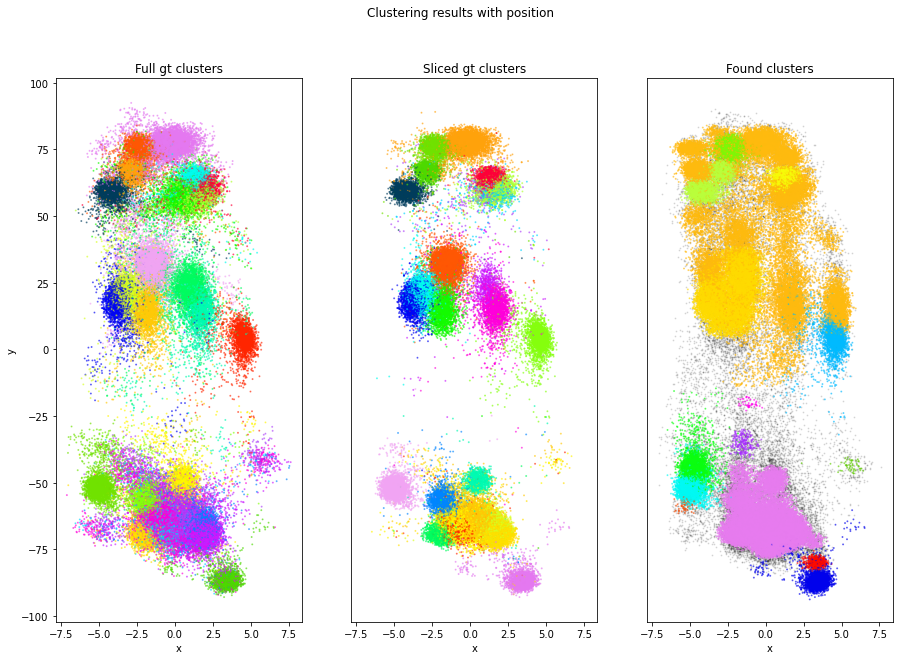

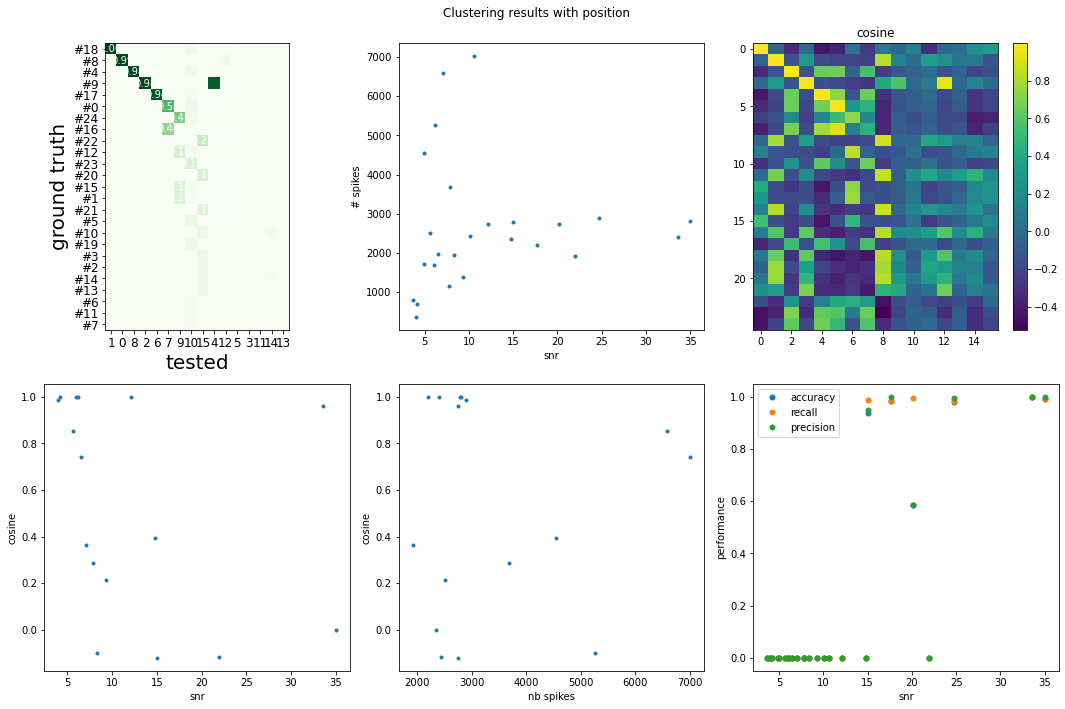

In [64]:
benchmarks['position'].plot_clusters(show_probe=False)
benchmarks['position'].plot_statistics()

# Clustering with position + fixed SVD (see Pierre, to continue)

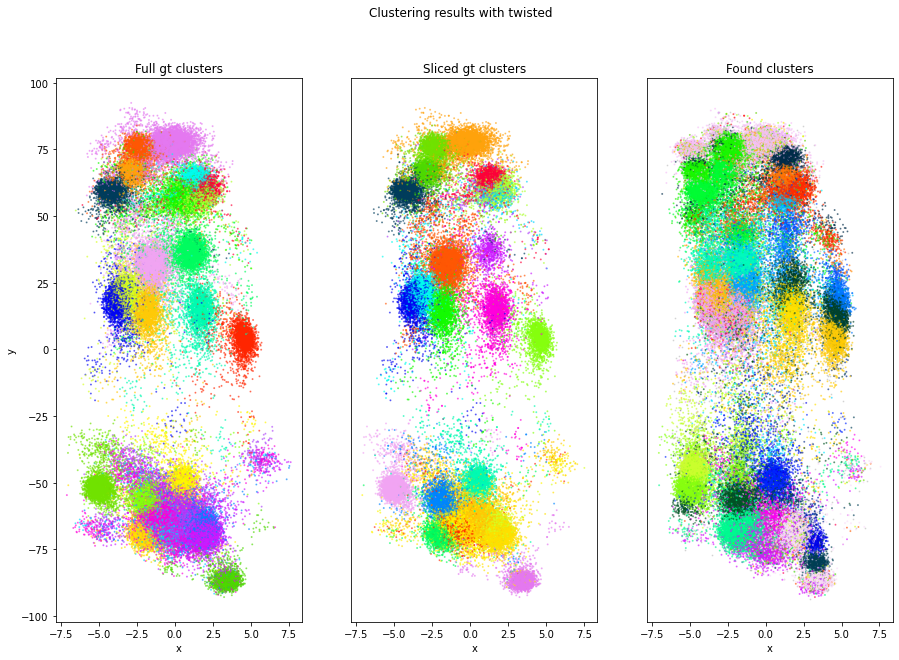

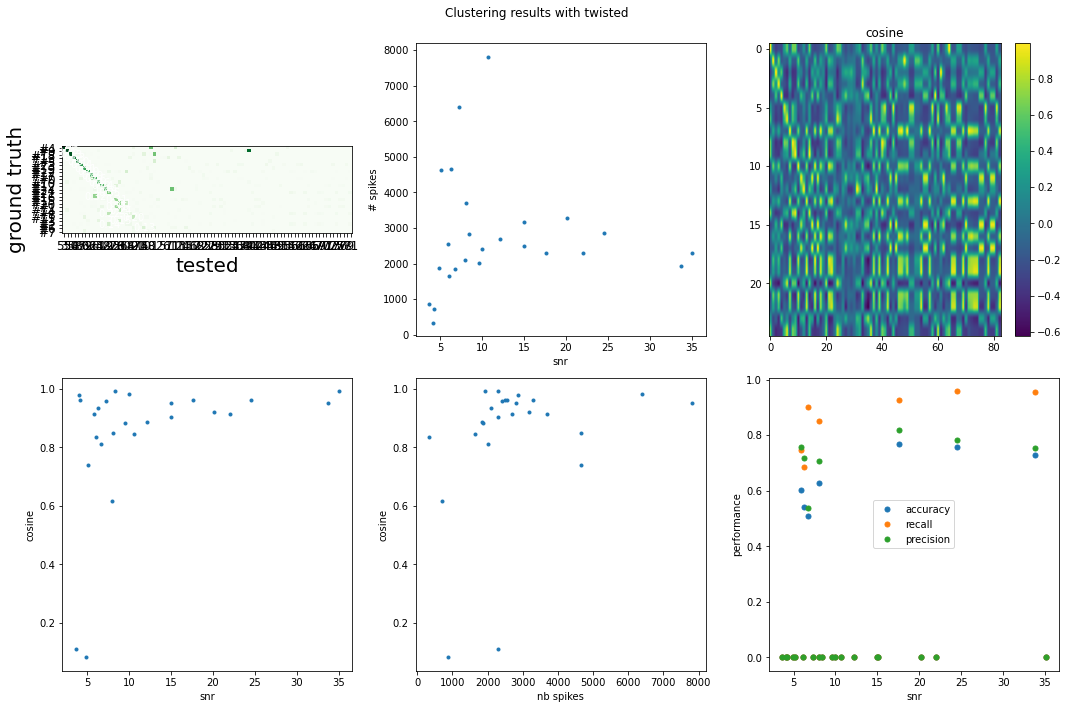

In [65]:
benchmarks['twisted'].plot_clusters(show_probe=False)
benchmarks['twisted'].plot_statistics()

# Clustering with position and ptp cleaned (see Cole for details)

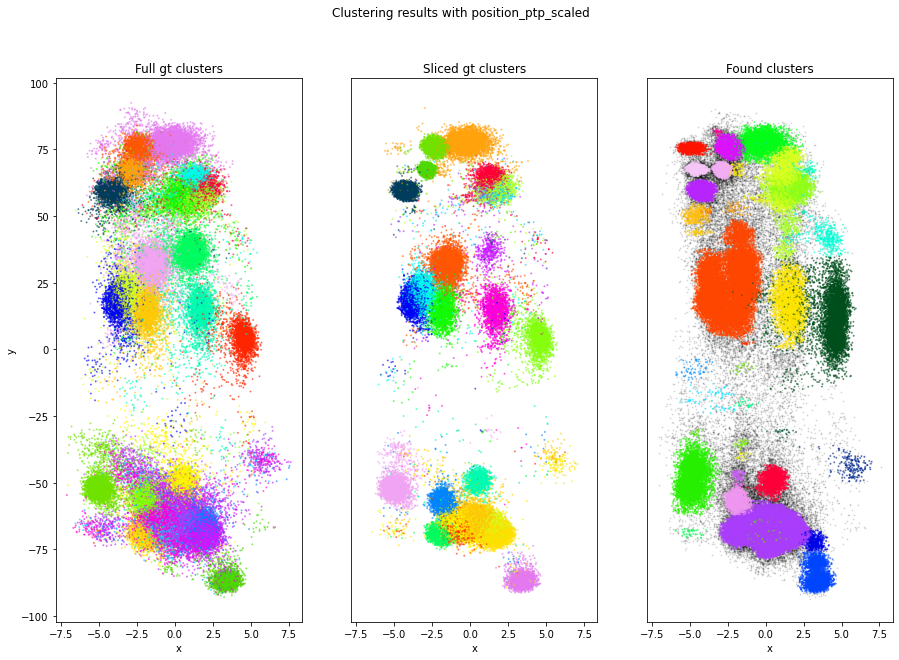

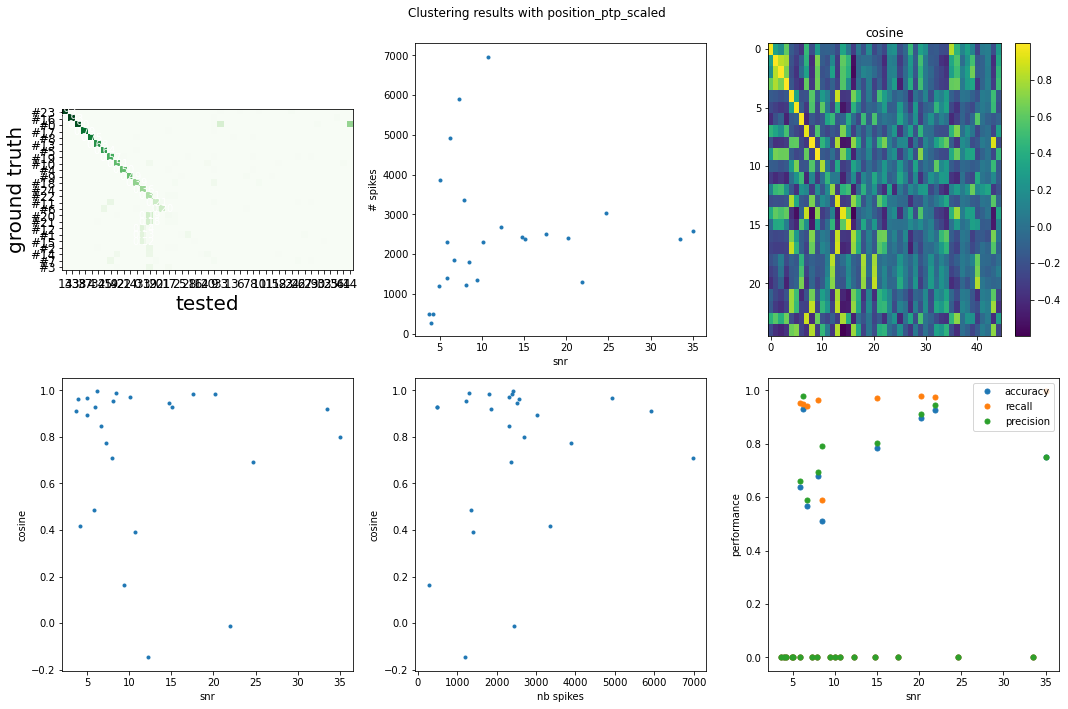

In [66]:
benchmarks['position_ptp_scaled'].plot_clusters(show_probe=False)
benchmarks['position_ptp_scaled'].plot_statistics()

# Clustering with position + PCA (see Sam for details)

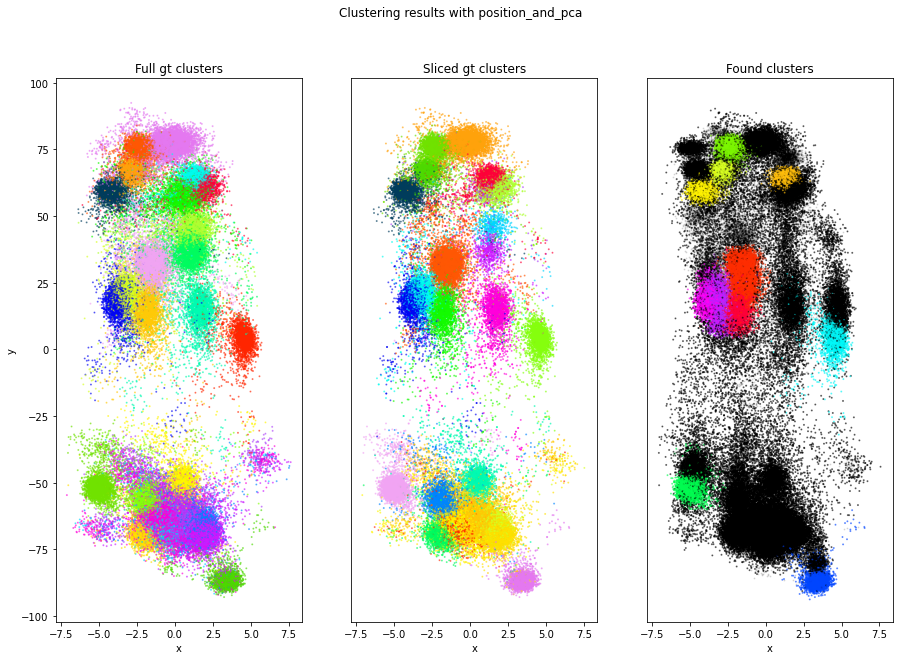

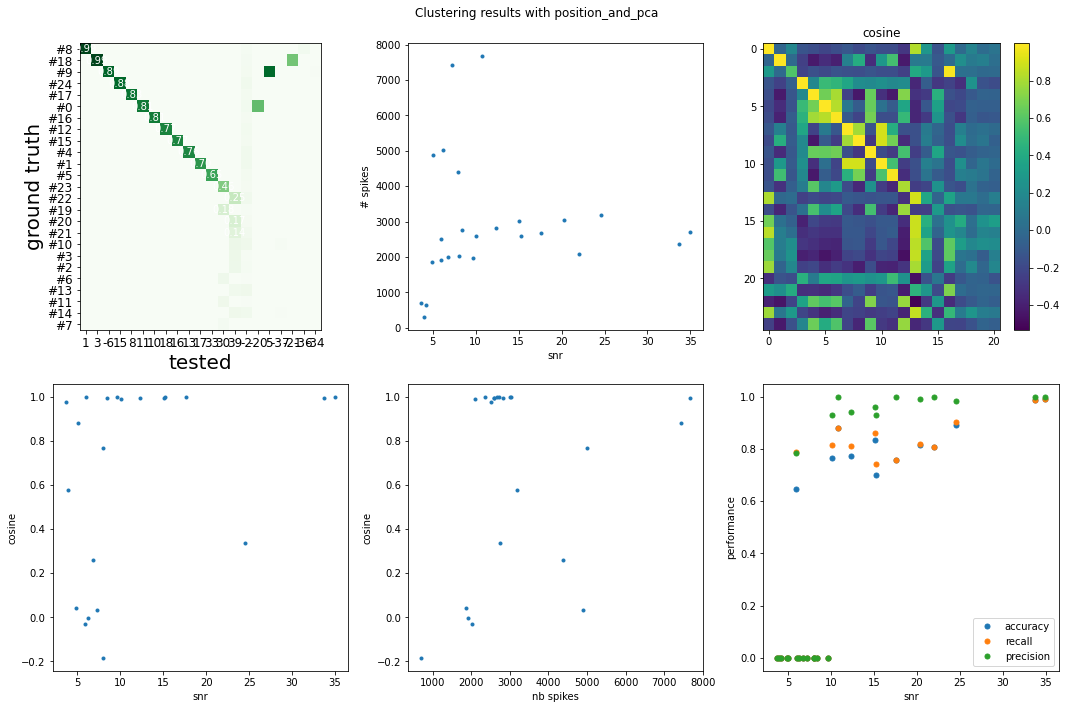

In [67]:
benchmarks['position_and_pca'].plot_clusters(show_probe=False)
benchmarks['position_and_pca'].plot_statistics()